<a href="https://colab.research.google.com/github/KehEatCode/Projects/blob/main/PCA%20and%20tSNE%3A%20Used%20car%20price%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA and t-SNE Project: Auto MPG**




-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset** 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [29]:
from google.colab import files
upload = files.upload()

Saving auto-mpg.csv to auto-mpg (1).csv


In [41]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

### **Loading the data**

In [42]:
data = pd.read_csv("auto-mpg.csv")

In [43]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


### **Checking the info of the data**

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

- There are **398 observations and 8 columns** in the data.
- **All variables except horsepower and car name are of numeric data type.**
- The horsepower must be a numeric data type. We will explore this further.

## **Data Preprocessing and Exploratory Data Analysis**

### **Checking the unique values in the 'car name' column**

In [45]:
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [46]:
# Creating copy of the data so that we don't lose the original data
data1 = data.copy()

# Dropping the column 'car name'
data = data.drop(['car name'], axis = 1)

### **Checking values in the horsepower column**

In [47]:
# Checking if there are values other than digits in the column 'horsepower'

hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # If the string consists of digits return True else False

data[hpIsDigit['horsepower'] == False]   # Take only those rows where horsepower is not a digit

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are **6 observations where horsepower is ?**. We can consider these values as **missing values**.
- We can **impute these missing values and change the data type** of horsepower column. 
- First, we need to **replace the ? with np.nan**.

In [48]:
# Replacing ? with np.nan
data = data.replace('?', np.nan)

data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [49]:
# Imputing the missing values with the median value of the column horsepower
data.horsepower.fillna(data.horsepower.median(), inplace = True)

data['horsepower'] = data['horsepower'].astype('float64')  # Converting the horsepower column from object data type to float

### **Summary Statistics**

 
**Check the summary statistics of the data**  

In [50]:
# Write your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


**Observations:________**

* The average miles per gallon for vintage cars are 24 miles.

* The average number of cylinders are 5.

* At least 75% of vintage cars' engine displacement are 262 cu.inches

* The average horsepower are 104; the average weight of vintage cars are 2970 lbs

* The average time taken to accelerate from 0 to 60mps are 16 seconds





### **Check the distribution and outliers for each column in the data**


- **Create histograms to check the distribution of all the variables**
- **Create boxplots to visualize the outliers for all the variables**


mpg
Skew : 0.46


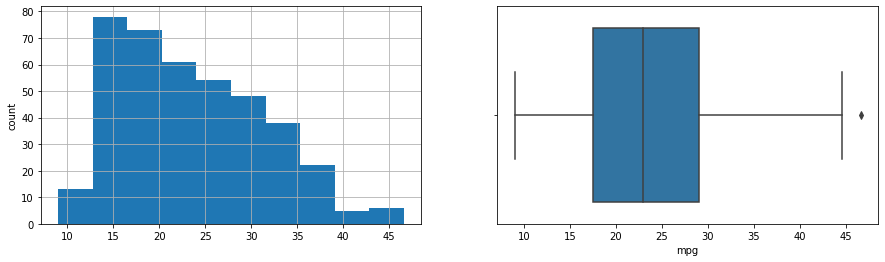

cylinders
Skew : 0.53


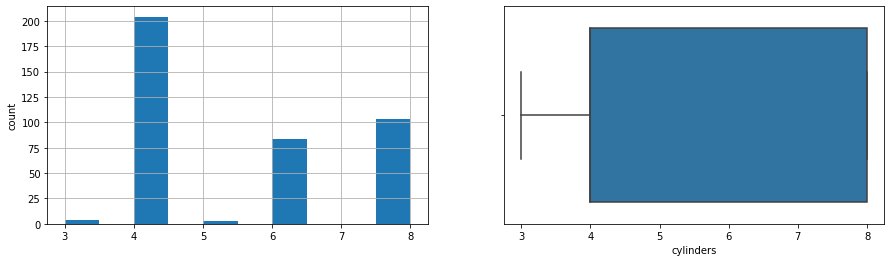

displacement
Skew : 0.72


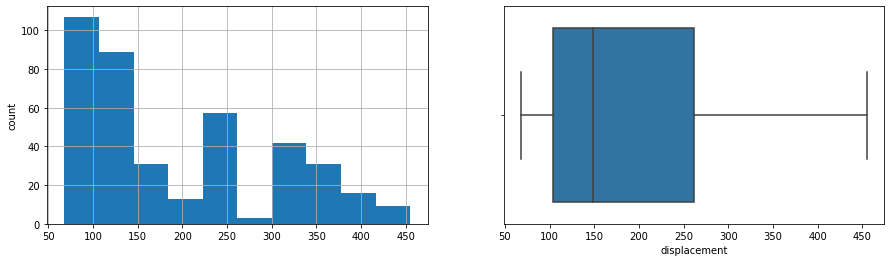

horsepower
Skew : 1.11


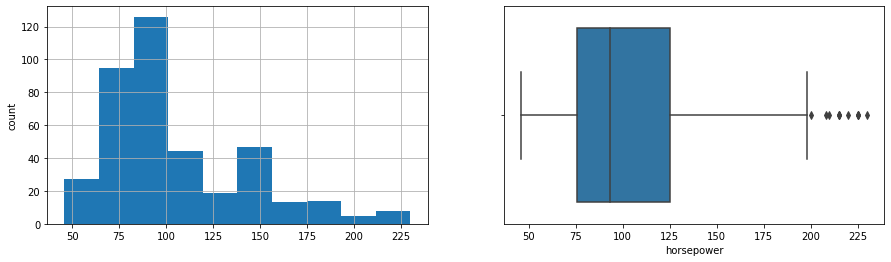

weight
Skew : 0.53


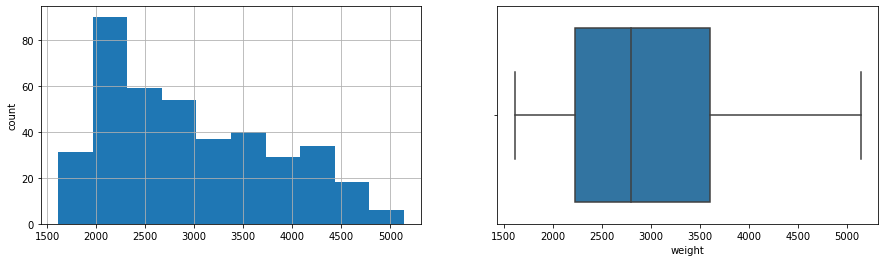

acceleration
Skew : 0.28


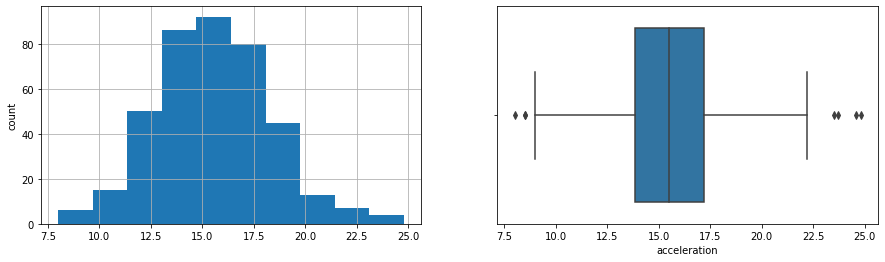

model year
Skew : 0.01


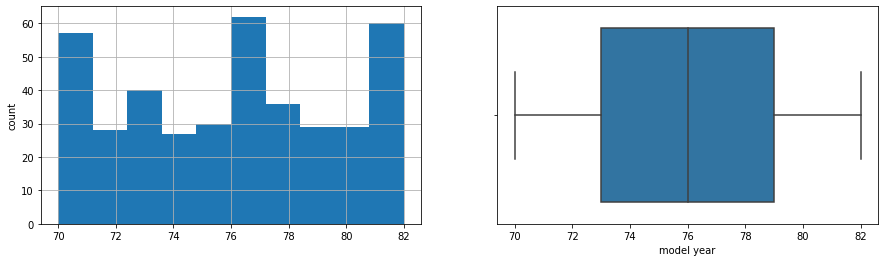

In [51]:
# Complete the below code by filling the blanks, before running this cell, to avoid any errors

for col in data.columns:
    print(col)

    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist()
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

**Observations:_____________**

* The distribution of mpg, cylinders, displacement, horsepower, weight are highly right-skewed. Almost all these variables have outliers towards the right, except displacement and weight, they don't have outliers..



* The distribution of acceleration are normal distribution. It is evidence from the boxplots that the variable of acceleration have outliers for both the left and right side.
 

### **Checking the correlation**

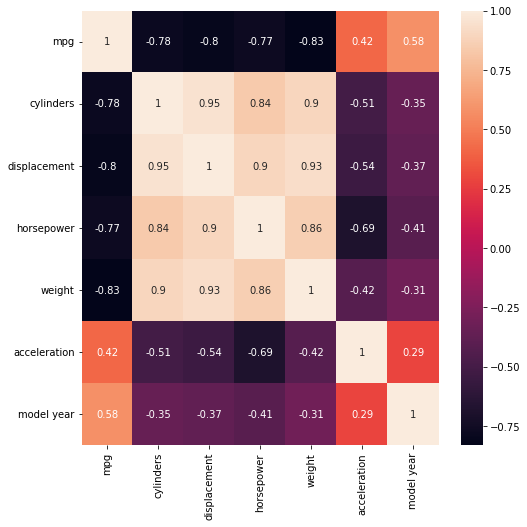

In [52]:
plt.figure(figsize = (8, 8))

sns.heatmap(data.corr(), annot = True)

plt.show()

**Observations:**
- The variable mpg has a strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has a strong positive correlation with horsepower, displacement, and cylinders.
- model year is positively correlated with mpg.

### **Scaling the data**

In [53]:
# Scaling the data
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [54]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## **Principal Component Analysis**



- **Apply the PCA algorithm with number of components equal to the total number of columns in the data**


In [55]:
# Defining the number of principal components to generate 
n = data_scaled.shape[1]

# Finding principal components for the data
pca = PCA(n_components=n, random_state=1)  # Apply the PCA algorithm with random_state = 1

data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))   # Fit and transform the pca function on scaled data

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

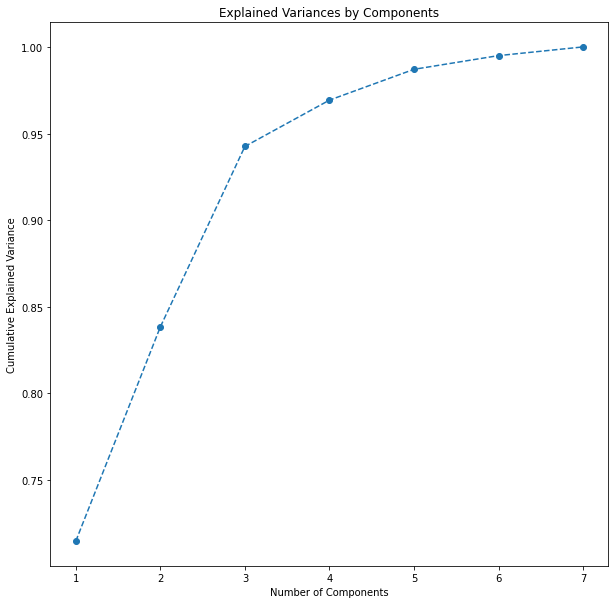

In [56]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 8), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [57]:
# Finding the least number of components that can explain more than 90% variance
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.90):
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  3


In [19]:
pc_comps = ['PC1', 'PC2', 'PC3']

data_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


**Checking the coefficients of the first three principal components from the below DataFrame**

In [58]:
def color_high(val):
    if val <= -0.40:
        return 'background: pink'
    
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


* The first principle component, PC1, seems to be positively related to configureations of attributes, such as cylinder, displacement, horespower, weight. Besides, the PC1 is negatively related with mpg.

* The second principle component, PC2, has a negative correlation with model year

* The third principle component, PC3, has a positive correlation with acceleration.

#### We can also visualize the data in 2 dimensions using the first two principal components 

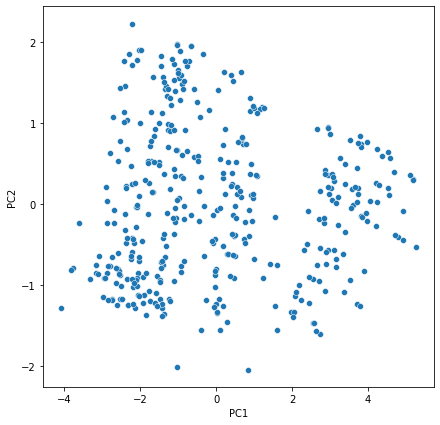

In [21]:
plt.figure(figsize = (7, 7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Adding hue to the scatter plot**


**Create a scatter plot for the first two principal components with hue = 'cylinders'** 


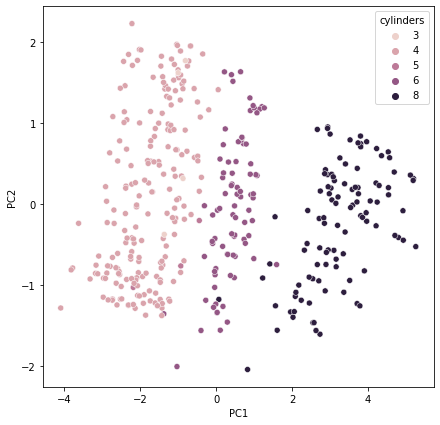

In [59]:
df_concat = pd.concat([data_pca1, data], axis = 1)

plt.figure(figsize = (7, 7))

sns.scatterplot(data=df_concat,x=df_concat[0],y=df_concat[1],hue='cylinders')   # Create a scatter plot with x = 0 and y = 1 using df_concat dataframe

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Observations:___________**

* We can clearly see there are 3 groups in the data

## t-SNE

**Apply the t-SNE embedding with 2 components for the DataFrame 'data_scaled' (use random_state = 1)**


  
**Visualize the data for different perplexity values**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

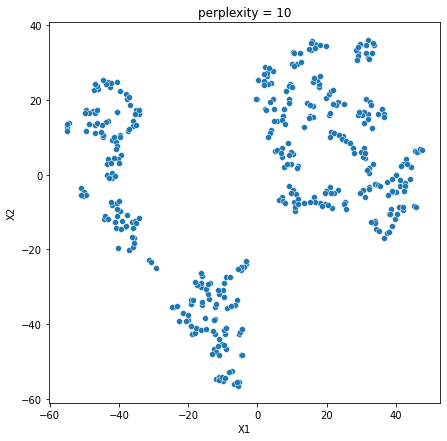

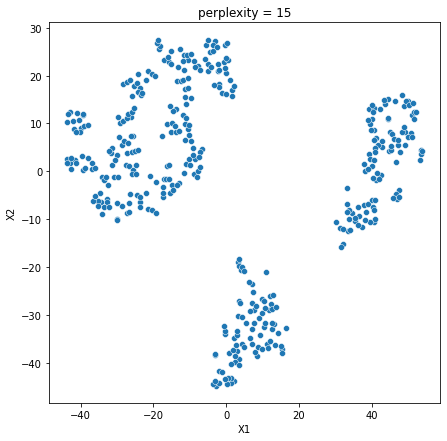

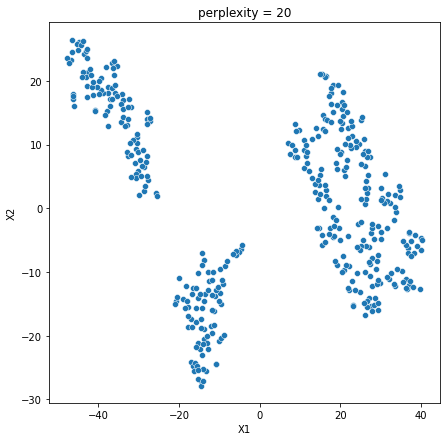

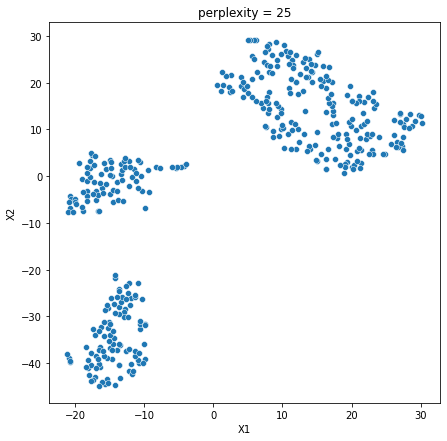

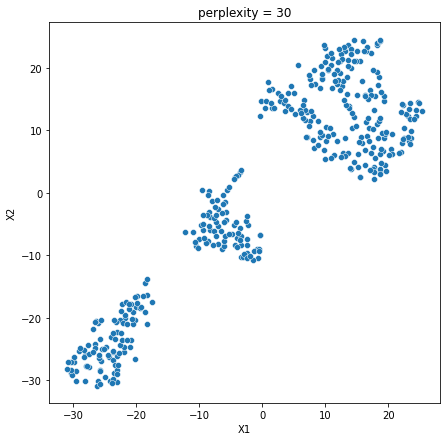

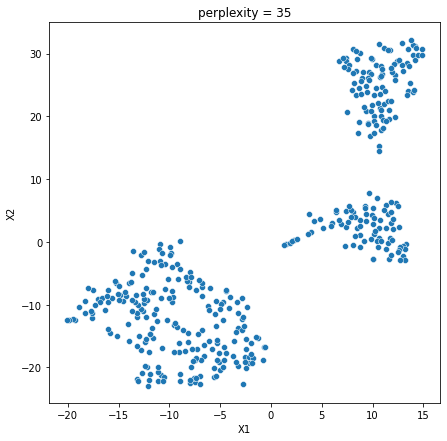

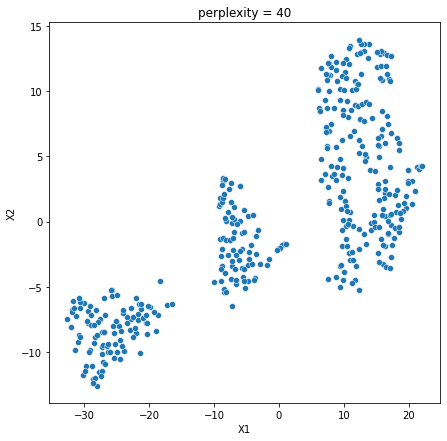

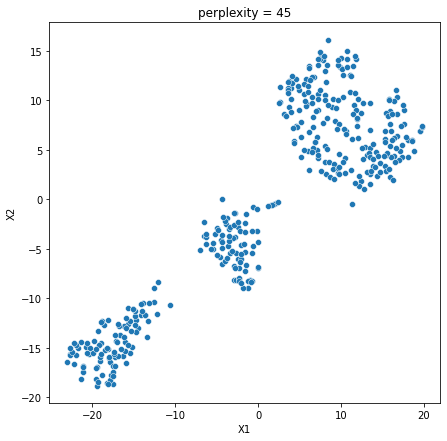

In [146]:
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
    
    data_tsne = tsne.fit_transform(data_scaled)
    
    data_tsne = pd.DataFrame(data_tsne)
    
    data_tsne.columns = ['X1', 'X2']
    
    plt.figure(figsize = (7,7))
    
    sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)
    
    plt.title("perplexity = {}".format(i))

In [212]:
tsne = TSNE(n_components = 2, random_state=1, perplexity = 32)            # Apply the t-SNE algorithm with random_state = 1

data_tsne = tsne.fit_transform(data_scaled)   # Fit and transform t-SNE function on the scaled data

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [213]:
data_tsne.shape

(398, 2)

In [214]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [215]:
data_tsne.head()

,Component 1,Component 2
0,-32.634972,-18.074915
1,-34.074116,-16.765394
2,-33.521332,-17.674826
3,-33.016731,-17.429501
4,-33.370296,-18.057352


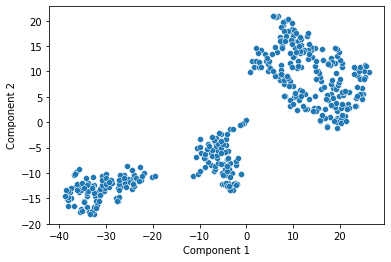

In [217]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1])

plt.show()

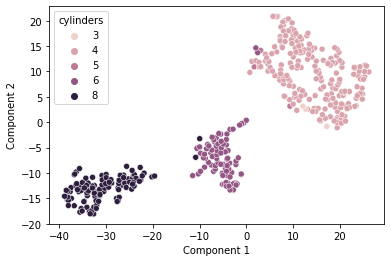

In [218]:
# Let's see the scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data.cylinders)

plt.show()

In [219]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']
    
    second_component = x['Component 2']
    
    if (first_component > 0) and (second_component > -5): 
        return 'group_1'
    
    if (first_component > -20 ) and (first_component < 5):
        return 'group_2'
    
    else: 
        return 'group_3'

In [220]:
data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

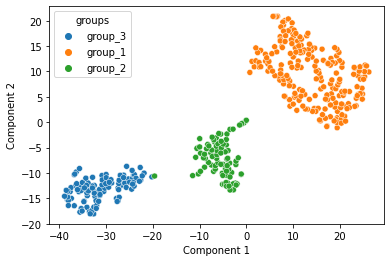

In [221]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data_tsne.iloc[:,2])

plt.show()

In [222]:
data['groups'] = data_tsne['groups'] 

**Visualize the properties of these four groups with respect to all the numeric variables in the data.** 

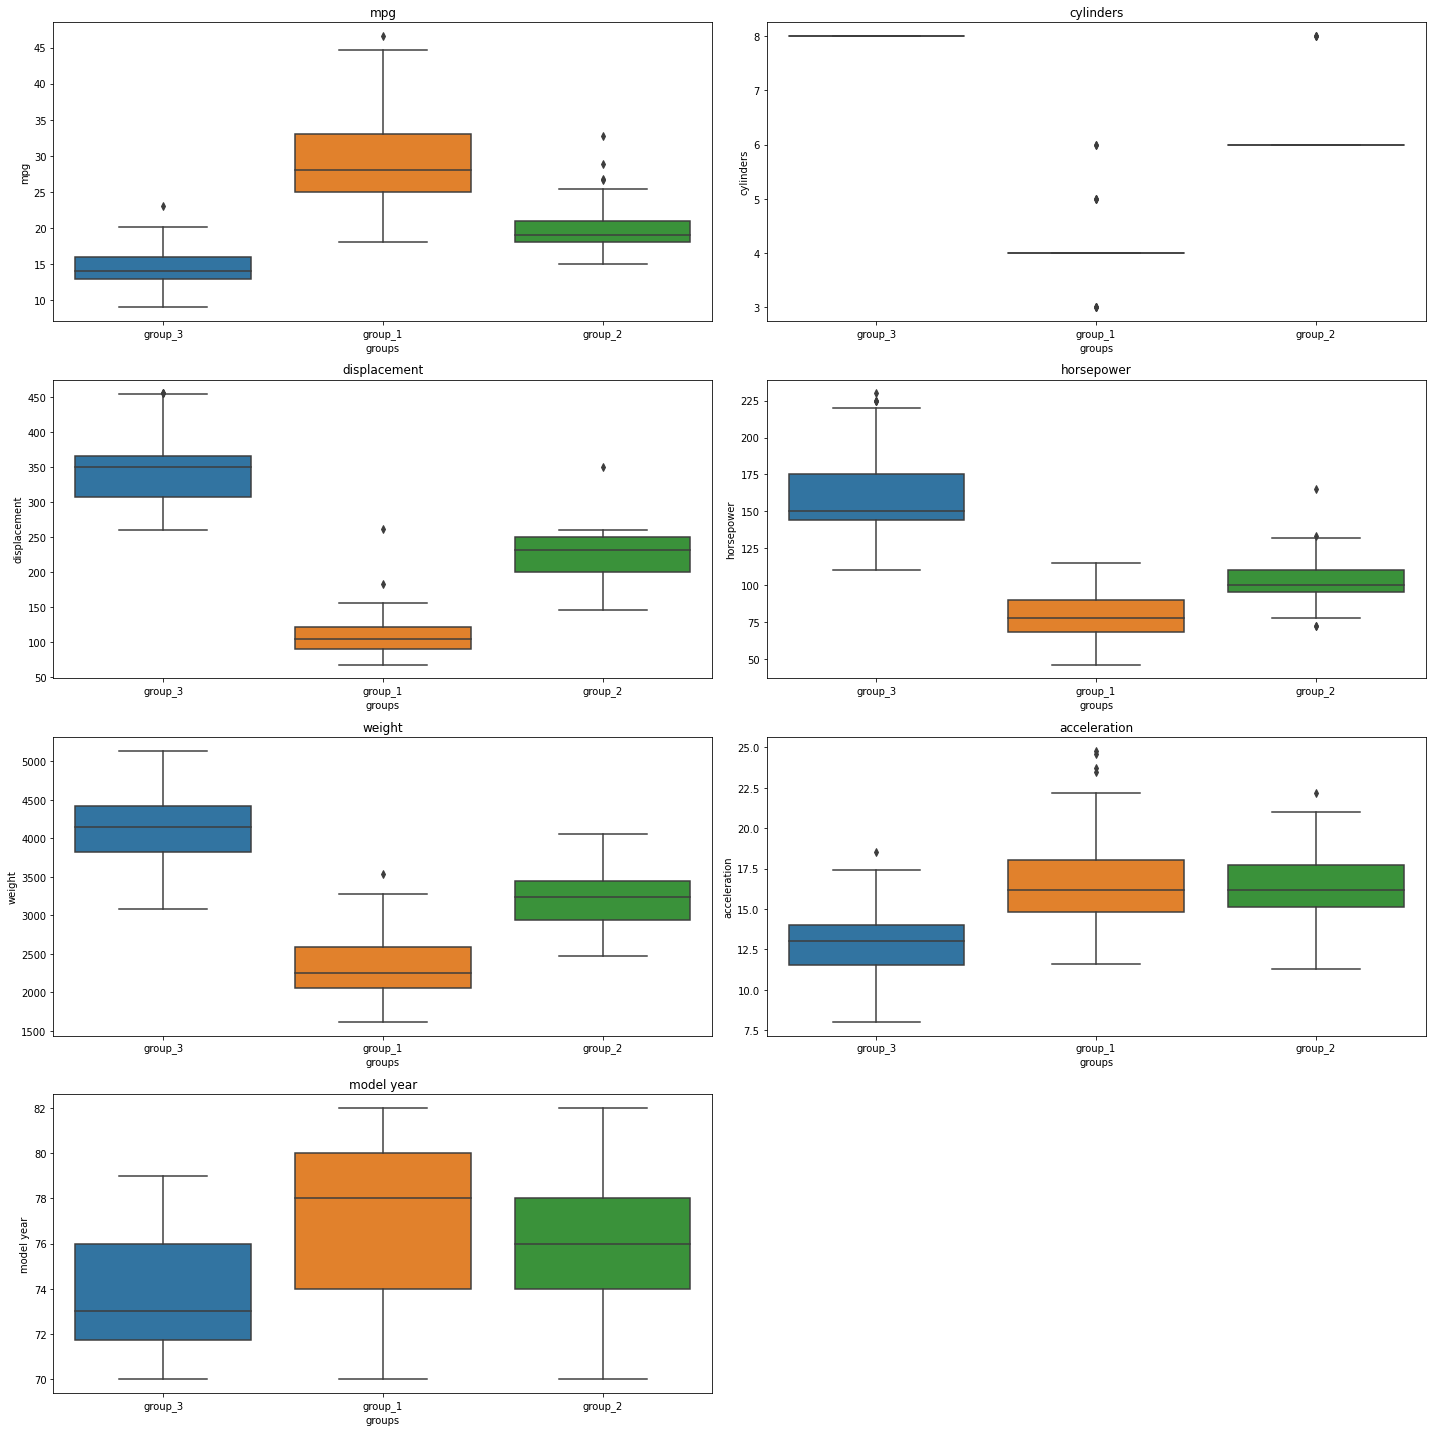

In [223]:
all_col = data.columns.tolist()

plt.figure(figsize = (20, 20))

for i, variable in enumerate(all_col): 
    if i == 7:
        break
    
    plt.subplot(4, 2, i + 1)
    
    sns.boxplot(y=data[variable], x=data['groups'])     # Create the boxplot with groups on the x-axis and variable on the y-axis (use the DataFrame 'data')
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

**Observations:___________**

* There are three groups in the data. Each group has a different set of characterisitcs.

* The first group represents low-priced cars. Due to the long-term manufacturing years of this group of cars, the previous technical level was insufficient, resulting in the cars with low horsepower, small number of cylinders, high engine displacement, and long time needed to accelerate from 0 to 60mph.

* The second group represents mid-priced cars. This group of cars has been built for a long time, has medium horsepower, medium cylinder count, medium engine displacement, and takes a long time to accelerate from 0 to 60 mph.

* The third group represents high-priced cars. This set of cars is built very new, has high horsepower, a high number of cylinders, a low engine displacement, and takes a short time to accelerate from 0 to 60 mph.


